In [13]:
# Lab 9 XOR
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
# 0 or 1 이기 때문에 softmax 말고 logistic 사용
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run(W))

    # Accuracy report
    # Accuracy가 최대 0.5 밖에 안나옴
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


sess.close()

0 0.8985989 [[-1.1930898]
 [ 1.1206349]]
100 0.7235458 [[-0.42634773]
 [ 0.8861095 ]]
200 0.7027637 [[-0.19259916]
 [ 0.517758  ]]
300 0.69622177 [[-0.08037563]
 [ 0.30058056]]
400 0.69416517 [[-0.02749756]
 [ 0.17624518]]
500 0.6935009 [[-0.00422564]
 [ 0.10465258]]
600 0.6932769 [[0.00481089]
 [0.06298072]]
700 0.69319725 [[0.00734142]
 [0.03841739]]
800 0.69316745 [[0.00714238]
 [0.02374372]]
900 0.6931556 [[0.00598925]
 [0.01485792]]
1000 0.6931509 [[0.00466668]
 [0.00940444]]
1100 0.6931488 [[0.00348328]
 [0.00601426]]
1200 0.6931479 [[0.00252922]
 [0.00388128]]
1300 0.6931475 [[0.00180227]
 [0.00252457]]
1400 0.69314736 [[0.00126732]
 [0.00165317]]
1500 0.69314724 [[0.00088256]
 [0.00108866]]
1600 0.6931472 [[0.00061018]
 [0.00072026]]
1700 0.6931472 [[0.00041966]
 [0.00047847]]
1800 0.6931472 [[0.00028738]
 [0.0003188 ]]
1900 0.6931471 [[0.00019617]
 [0.00021296]]
2000 0.6931472 [[0.00013358]
 [0.00014255]]
2100 0.6931471 [[9.078262e-05]
 [9.557368e-05]]
2200 0.6931472 [[6.16031

In [14]:
# Lab 9 XOR
# Neural Network를 사용하여 XOR 문제를 풀 수 있음

import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

# 중간 단계 출력은 맘대로 정하면 됨
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

# Shape = layer1의 입력, Y출력
W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)



sess.close()

0 0.695284 [array([[-0.2616276 ,  0.48828107],
       [-0.5593197 , -1.2278296 ]], dtype=float32), array([[ 1.2057099],
       [-0.3781529]], dtype=float32)]
100 0.6928399 [array([[-0.18077278,  0.5176141 ],
       [-0.5159193 , -1.2293258 ]], dtype=float32), array([[ 1.217956  ],
       [-0.37085116]], dtype=float32)]
200 0.6920541 [array([[-0.12008159,  0.5545679 ],
       [-0.49171996, -1.2281518 ]], dtype=float32), array([[ 1.2128848],
       [-0.4046389]], dtype=float32)]
300 0.6913067 [array([[-0.0675004 ,  0.59813046],
       [-0.4760865 , -1.2276341 ]], dtype=float32), array([[ 1.2128674 ],
       [-0.44149455]], dtype=float32)]
400 0.69050777 [array([[-0.02069339,  0.64894575],
       [-0.46706387, -1.2286153 ]], dtype=float32), array([[ 1.2174253 ],
       [-0.48190066]], dtype=float32)]
500 0.6895817 [array([[ 0.02207451,  0.7077227 ],
       [-0.46339917, -1.2321478 ]], dtype=float32), array([[ 1.2261467],
       [-0.5269579]], dtype=float32)]
600 0.68845487 [array([[ 0.062

5600 0.03389452 [array([[ 5.047941 ,  5.823449 ],
       [-5.3293552, -5.6654754]], dtype=float32), array([[ 8.523496],
       [-7.916183]], dtype=float32)]
5700 0.032810558 [array([[ 5.074176 ,  5.8464437],
       [-5.355146 , -5.687659 ]], dtype=float32), array([[ 8.5844965],
       [-7.976095 ]], dtype=float32)]
5800 0.031790942 [array([[ 5.0994806,  5.8686824],
       [-5.3800263, -5.7091036]], dtype=float32), array([[ 8.643697],
       [-8.034316]], dtype=float32)]
5900 0.030830216 [array([[ 5.123914 ,  5.8902087],
       [-5.4040527, -5.729852 ]], dtype=float32), array([[ 8.701193],
       [-8.090932]], dtype=float32)]
6000 0.02992358 [array([[ 5.1475267,  5.911065 ],
       [-5.4272776, -5.749947 ]], dtype=float32), array([[ 8.757081],
       [-8.146028]], dtype=float32)]
6100 0.029066663 [array([[ 5.170369,  5.931288],
       [-5.449746, -5.769426]], dtype=float32), array([[ 8.811444],
       [-8.199678]], dtype=float32)]
6200 0.028255645 [array([[ 5.1924853,  5.95091  ],
     

In [15]:
# Lab 9 XOR
# NN을 더 Wide 하게 연결시켜보자

import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

# 중간 출력을 10으로
W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name='weight2')
b2 = tf.Variable(tf.random_normal([10]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, 10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

# 마지막 출력만 1로
W4 = tf.Variable(tf.random_normal([10, 1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)




0 0.95243084 [array([[-2.2748609 , -0.26814577,  0.07820164, -0.2966127 ,  0.7173112 ,
         0.6149635 ,  0.22094822,  0.70455116,  0.47013253,  0.0805568 ],
       [-0.12582287, -2.5427322 ,  1.2060815 ,  0.8404891 ,  1.4265941 ,
         1.1575689 , -0.37589213,  0.77068585, -1.4413171 ,  1.1582482 ]],
      dtype=float32), array([[ 0.22224632, -0.95943934,  0.5704295 ,  0.27085817, -0.92699146,
         0.17884322,  0.6085361 ,  0.02286204, -0.9484729 , -0.53601086],
       [ 0.9985509 ,  0.74279404, -1.4972812 ,  1.2863685 , -0.14762273,
         2.3166192 ,  0.14887856, -1.558511  ,  1.756087  , -0.97507006],
       [-0.70736676, -1.0888921 ,  0.7995592 , -1.0858301 ,  1.7503927 ,
        -0.08272998,  1.2158375 ,  0.20179152,  1.217681  ,  1.0752765 ],
       [-0.40282628,  0.17585449,  0.53121424,  1.158863  ,  0.9518795 ,
        -0.862245  ,  0.95640934, -1.8851268 , -1.5713342 , -0.5455279 ],
       [ 0.35531032,  0.5094872 ,  0.13520178,  0.17770892,  1.3093536 ,
        

900 0.67429674 [array([[-2.2854106 , -0.6921563 , -0.04410742, -0.4940536 ,  0.6284468 ,
         0.73901206,  0.22866769,  0.54129606,  0.88671756,  0.01441746],
       [-0.148581  , -2.6369243 ,  1.226104  ,  0.9695589 ,  1.4145824 ,
         1.1981115 , -0.370505  ,  0.7209274 , -1.5494063 ,  1.1531312 ]],
      dtype=float32), array([[ 0.23319183, -1.0064858 ,  0.4848408 ,  0.2754909 , -0.83481723,
         0.17811766,  0.6799542 ,  0.06936423, -1.0321724 , -0.5360565 ],
       [ 1.0660315 ,  0.6626919 , -1.6096442 ,  1.3334969 , -0.05792667,
         2.3169386 ,  0.12998669, -1.5763599 ,  1.7163308 , -0.96913403],
       [-0.72561365, -1.1283975 ,  0.73233527, -1.0573728 ,  1.7795073 ,
        -0.08347211,  1.2485386 ,  0.19223438,  1.1841638 ,  1.0808814 ],
       [-0.40520108,  0.12143281,  0.41749984,  1.1875955 ,  1.0112603 ,
        -0.86303186,  1.0273182 , -1.8954275 , -1.6305844 , -0.5404054 ],
       [ 0.3316666 ,  0.45217508,  0.11885335,  0.22996052,  1.3423009 ,
      

1400 0.61251634 [array([[-2.3145626 , -1.3460989 , -0.28585762, -0.6818034 ,  0.5720984 ,
         0.8502348 ,  0.26819965,  0.41331428,  1.3975245 , -0.12344804],
       [-0.23760045, -2.8692632 ,  1.3253156 ,  1.2284528 ,  1.4064116 ,
         1.2799836 , -0.38905147,  0.70941055, -1.883837  ,  1.154925  ]],
      dtype=float32), array([[ 0.23534432, -1.110535  ,  0.46832898,  0.27103326, -0.7861051 ,
         0.17710471,  0.74588305,  0.15796536, -1.093486  , -0.53719056],
       [ 1.2666726 ,  0.54589564, -1.8620795 ,  1.3708727 , -0.00778215,
         2.3172805 ,  0.2533787 , -1.6370683 ,  1.6561401 , -0.9680706 ],
       [-0.76726955, -1.1963522 ,  0.67802256, -1.0334642 ,  1.7774667 ,
        -0.08452138,  1.3737836 ,  0.21854718,  1.1429608 ,  1.0837109 ],
       [-0.41864538,  0.01867765,  0.32466182,  1.2093191 ,  1.0276432 ,
        -0.86419415,  1.1938128 , -1.8690493 , -1.6916373 , -0.5382136 ],
       [ 0.274214  ,  0.41753462,  0.11971235,  0.29083082,  1.3166187 ,
     

2000 0.38048983 [array([[-2.4620738 , -2.2924294 , -1.0108598 , -0.7878141 ,  0.5355877 ,
         0.9278695 ,  0.4242746 ,  0.43997604,  1.9053124 , -0.18211408],
       [ 0.21341261, -3.6009202 ,  1.5323278 ,  1.799421  ,  1.4029421 ,
         1.480149  , -0.4398429 ,  0.7027167 , -2.841554  ,  1.219105  ]],
      dtype=float32), array([[-0.09619766, -1.2064723 ,  1.1315241 ,  0.26710042, -0.7620461 ,
         0.1738074 ,  0.6843838 ,  0.81710666, -1.1288351 , -0.5355707 ],
       [ 1.7593713 ,  0.36019784, -2.3938482 ,  1.4061893 ,  0.07613291,
         2.317808  ,  0.4729168 , -2.020716  ,  1.5796235 , -0.9666091 ],
       [-0.93049884, -1.3509309 ,  0.80922866, -1.0174472 ,  1.7649026 ,
        -0.08731961,  1.7059573 ,  0.46999413,  1.0850883 ,  1.0877028 ],
       [-0.45995963, -0.16902362,  0.28992832,  1.2386168 ,  1.0217975 ,
        -0.866815  ,  1.5809073 , -1.7389184 , -1.7671475 , -0.5335128 ],
       [ 0.27400273,  0.37185326,  0.08216025,  0.39310932,  1.2277316 ,
     

2600 0.04793273 [array([[-3.223938  , -2.9334397 , -2.0563345 , -0.9871943 ,  0.51195604,
         0.95688236,  0.6962064 ,  0.58417714,  2.460514  , -0.21822919],
       [ 0.96388173, -4.057186  ,  1.3942956 ,  2.1780078 ,  1.4023616 ,
         1.5930456 , -0.56881577,  0.56069815, -3.5526738 ,  1.3286365 ]],
      dtype=float32), array([[-8.09767306e-01, -1.24552369e+00,  2.17216849e+00,
         3.14332157e-01, -7.85399437e-01,  1.69902831e-01,
         6.62755549e-01,  1.79073346e+00, -1.13685167e+00,
        -5.36496997e-01],
       [ 1.96407044e+00,  3.03236604e-01, -2.83269596e+00,
         1.32886434e+00,  1.75754949e-01,  2.31795812e+00,
         5.94156027e-01, -2.38121891e+00,  1.55378819e+00,
        -9.70144689e-01],
       [-1.26646888e+00, -1.44900775e+00,  1.36782658e+00,
        -9.46675479e-01,  1.75193131e+00, -8.95353779e-02,
         1.82554924e+00,  9.96886909e-01,  1.07421553e+00,
         1.08785546e+00],
       [-2.69836277e-01, -3.19820374e-01,  1.17894270e-01

3200 0.016760701 [array([[-3.4428277 , -3.130702  , -2.2956667 , -1.0979636 ,  0.5021226 ,
         0.9751153 ,  0.76552266,  0.6011458 ,  2.6566763 , -0.2679886 ],
       [ 1.1316282 , -4.1578417 ,  1.4354422 ,  2.2881527 ,  1.4027827 ,
         1.6147519 , -0.6177841 ,  0.5207623 , -3.7532763 ,  1.3649123 ]],
      dtype=float32), array([[-0.9744868 , -1.2671854 ,  2.377827  ,  0.3469021 , -0.7883349 ,
         0.16903855,  0.6744818 ,  1.9974802 , -1.1402315 , -0.5368985 ],
       [ 2.0332613 ,  0.27838928, -2.9918048 ,  1.2969515 ,  0.21009175,
         2.3179908 ,  0.6281329 , -2.5165274 ,  1.5464877 , -0.97148865],
       [-1.3847454 , -1.4725691 ,  1.5303878 , -0.9127465 ,  1.7476577 ,
        -0.09016207,  1.8433979 ,  1.1576475 ,  1.0721391 ,  1.087744  ],
       [-0.20542458, -0.3786897 ,  0.04283686,  1.3215828 ,  1.0715753 ,
        -0.86695   ,  1.9530587 , -1.9381891 , -1.7970353 , -0.5353253 ],
       [ 0.38486585,  0.38056535, -0.00444865,  0.44826183,  1.1922181 ,
    

3800 0.009469924 [array([[-3.5428262 , -3.2219894 , -2.403208  , -1.1520023 ,  0.49736938,
         0.9839719 ,  0.7982934 ,  0.6086816 ,  2.7454393 , -0.29345524],
       [ 1.2141334 , -4.204507  ,  1.4650377 ,  2.342895  ,  1.4031037 ,
         1.6243788 , -0.642193  ,  0.5035959 , -3.8490164 ,  1.3835244 ]],
      dtype=float32), array([[-1.0508898 , -1.2775207 ,  2.4703977 ,  0.36557314, -0.79041374,
         0.16864412,  0.6797692 ,  2.0925243 , -1.1417226 , -0.5370385 ],
       [ 2.0671122 ,  0.26590776, -3.0665221 ,  1.2812698 ,  0.22634147,
         2.3179908 ,  0.64325774, -2.581905  ,  1.5430923 , -0.97211796],
       [-1.4422313 , -1.4831233 ,  1.6059653 , -0.89425176,  1.7450508 ,
        -0.09045749,  1.8505708 ,  1.2341968 ,  1.0712316 ,  1.0877357 ],
       [-0.17299744, -0.40837398,  0.00430717,  1.3331013 ,  1.0813572 ,
        -0.8669142 ,  1.989346  , -1.9722879 , -1.7995096 , -0.53561133],
       [ 0.3859368 ,  0.3766834 , -0.00524636,  0.45336547,  1.1898907 ,
    

4400 0.0064554876 [array([[-3.6047218 , -3.2784276 , -2.469514  , -1.1862035 ,  0.49437398,
         0.9895411 ,  0.8190869 ,  0.6134616 ,  2.7999802 , -0.30986056],
       [ 1.26722   , -4.2336125 ,  1.4864361 ,  2.3782444 ,  1.4033401 ,
         1.6302663 , -0.6579303 ,  0.4934576 , -3.9092388 ,  1.3957367 ]],
      dtype=float32), array([[-1.0989681 , -1.2839365 ,  2.5276816 ,  0.37838373, -0.79201347,
         0.1683974 ,  0.682946  ,  2.1519625 , -1.142609  , -0.53710914],
       [ 2.0886679 ,  0.2579051 , -3.11289   ,  1.2712467 ,  0.23651215,
         2.3179908 ,  0.652464  , -2.6232076 ,  1.5409862 , -0.97250664],
       [-1.4790509 , -1.489555  ,  1.653171  , -0.881813  ,  1.7432014 ,
        -0.09064512,  1.8547517 ,  1.282619  ,  1.0706905 ,  1.0877357 ],
       [-0.15204151, -0.42742026, -0.02084898,  1.3406457 ,  1.0877655 ,
        -0.8668886 ,  2.0118432 , -1.9947008 , -1.801037  , -0.53577965],
       [ 0.38658625,  0.3738299 , -0.0056207 ,  0.4568543 ,  1.1884481 ,
   

5000 0.0048492253 [array([[-3.648635  , -3.3183594 , -2.5165007 , -1.2107685 ,  0.49222875,
         0.9935195 ,  0.8341145 ,  0.6169347 ,  2.838501  , -0.32176337],
       [ 1.3058342 , -4.254359  ,  1.5029718 ,  2.4040148 ,  1.403531  ,
         1.6344141 , -0.66938907,  0.4865191 , -3.9523346 ,  1.404734  ]],
      dtype=float32), array([[-1.1335355 , -1.2884771 ,  2.5683866 ,  0.3880684 , -0.7933082 ,
         0.16822022,  0.68514705,  2.1944995 , -1.1432195 , -0.5371449 ],
       [ 2.1042318 ,  0.25211167, -3.1457465 ,  1.2639939 ,  0.24376954,
         2.3179908 ,  0.6589241 , -2.6528504 ,  1.539494  , -0.9727826 ],
       [-1.5057901 , -1.4940677 ,  1.6868598 , -0.87251514,  1.7417761 ,
        -0.09078117,  1.8576103 ,  1.3174754 ,  1.0703108 ,  1.0877357 ],
       [-0.1367772 , -0.4411997 , -0.03929502,  1.3461685 ,  1.0924741 ,
        -0.8668886 ,  2.0278149 , -2.0112214 , -1.8021147 , -0.53589475],
       [ 0.38706532,  0.3716313 , -0.00585239,  0.45948425,  1.1874228 ,
   

5500 0.003999642 [array([[-3.6771975 , -3.3442643 , -2.5470557 , -1.2268697 ,  0.49082547,
         0.9961161 ,  0.8440226 ,  0.61923665,  2.8634865 , -0.3296153 ],
       [ 1.3313737 , -4.267898  ,  1.5143093 ,  2.4210858 ,  1.4036502 ,
         1.6371006 , -0.6769745 ,  0.4821264 , -3.9805102 ,  1.4107374 ]],
      dtype=float32), array([[-1.1562483 , -1.291421  ,  2.5949059 ,  0.39463702, -0.79422534,
         0.1681038 ,  0.68655354,  2.2223518 , -1.1436056 , -0.5371747 ],
       [ 2.114477  ,  0.24829467, -3.1670754 ,  1.2592148 ,  0.24850622,
         2.3179908 ,  0.6630951 , -2.672272  ,  1.538524  , -0.972961  ],
       [-1.5234704 , -1.4969798 ,  1.7088599 , -0.8662534 ,  1.7407956 ,
        -0.09087103,  1.8594258 ,  1.3403777 ,  1.0700724 ,  1.0877357 ],
       [-0.12667435, -0.4502696 , -0.05155725,  1.3498291 ,  1.095609  ,
        -0.8668886 ,  2.038205  , -2.0222485 , -1.8028162 , -0.53596467],
       [ 0.3873913 ,  0.3701334 , -0.00599271,  0.46126318,  1.1867572 ,
    

      dtype=float32)]
6100 0.0032948176 [array([[-3.7051864 , -3.3695886 , -2.5770009 , -1.2427381 ,  0.4894451 ,
         0.99866664,  0.85384005,  0.62152743,  2.8879216 , -0.3373907 ],
       [ 1.3567241 , -4.2811913 ,  1.525854  ,  2.438051  ,  1.4037932 ,
         1.6397246 , -0.6845099 ,  0.47791758, -4.0082207 ,  1.4167384 ]],
      dtype=float32), array([[-1.1786941 , -1.294296  ,  2.620934  ,  0.40128198, -0.7951828 ,
         0.16798854,  0.68791157,  2.2497983 , -1.1439799 , -0.537201  ],
       [ 2.124611  ,  0.24451819, -3.1879332 ,  1.2544844 ,  0.25315928,
         2.3179908 ,  0.66716   , -2.6914065 ,  1.5375775 , -0.97313493],
       [-1.5410235 , -1.4998165 ,  1.7304866 , -0.8599511 ,  1.7397943 ,
        -0.09096047,  1.8611715 ,  1.3630013 ,  1.0698497 ,  1.0877357 ],
       [-0.11664256, -0.4592334 , -0.06377368,  1.3534647 ,  1.0987362 ,
        -0.8668886 ,  2.0483894 , -2.03327   , -1.8034996 , -0.5360362 ],
       [ 0.38772383,  0.36861923, -0.00612355,  0.4630

7000 0.0025965935 [array([[-3.7385983 , -3.3997304 , -2.6127594 , -1.2617934 ,  0.4877905 ,
         1.0017164 ,  0.8657067 ,  0.6243105 ,  2.9170325 , -0.34677404],
       [ 1.3874023 , -4.2971044 ,  1.5401849 ,  2.4586112 ,  1.4039608 ,
         1.6428478 , -0.69363886,  0.47302172, -4.0414205 ,  1.4240562 ]],
      dtype=float32), array([[-1.2057465 , -1.297713  ,  2.6520612 ,  0.40948614, -0.7964047 ,
         0.16784951,  0.6895069 ,  2.2827718 , -1.1444199 , -0.537201  ],
       [ 2.136831  ,  0.23996495, -3.2127604 ,  1.2487779 ,  0.25872734,
         2.3179908 ,  0.67198366, -2.7143745 ,  1.5364481 , -0.97334224],
       [-1.5622798 , -1.5031804 ,  1.756389  , -0.8522107 ,  1.7385387 ,
        -0.0910692 ,  1.8632172 ,  1.3902456 ,  1.0695825 ,  1.0877357 ],
       [-0.10449734, -0.4700252 , -0.07861491,  1.3578614 ,  1.1025412 ,
        -0.8668886 ,  2.0605476 , -2.0467088 , -1.8043112 , -0.53611416],
       [ 0.38814148,  0.36675784, -0.00627374,  0.4652653 ,  1.1853145 ,
   

7500 0.0023201485 [array([[-3.7540364 , -3.4136238 , -2.6292913 , -1.2706391 ,  0.4870236 ,
         1.0031285 ,  0.8712465 ,  0.62561584,  2.930465  , -0.35114658],
       [ 1.4017303 , -4.3044705 ,  1.5470049 ,  2.468225  ,  1.4040204 ,
         1.6442868 , -0.6979065 ,  0.4708078 , -4.0567975 ,  1.4274962 ]],
      dtype=float32), array([[-1.2183471 , -1.2992864 ,  2.6664681 ,  0.41337776, -0.79699856,
         0.16778454,  0.6902345 ,  2.2980895 , -1.1445998 , -0.537201  ],
       [ 2.1425219 ,  0.23784459, -3.224205  ,  1.2461196 ,  0.26130494,
         2.3179908 ,  0.6742027 , -2.7250338 ,  1.5359291 , -0.97343165],
       [-1.5722165 , -1.504726  ,  1.7683895 , -0.8485533 ,  1.7379401 ,
        -0.09111987,  1.8641484 ,  1.402923  ,  1.0694633 ,  1.0877357 ],
       [-0.09882241, -0.47504395, -0.08556762,  1.359912  ,  1.1043255 ,
        -0.8668886 ,  2.0661693 , -2.053026  , -1.8046807 , -0.53614396],
       [ 0.38834283,  0.36587942, -0.00634199,  0.4663089 ,  1.1849569 ,
   

8000 0.0020954586 [array([[-3.767815  , -3.426002  , -2.6440492 , -1.2785541 ,  0.48633823,
         1.0043873 ,  0.8762214 ,  0.62679034,  2.9424415 , -0.35506767],
       [ 1.4145968 , -4.3110523 ,  1.553195  ,  2.4768634 ,  1.40408   ,
         1.6455705 , -0.70174146,  0.4688581 , -4.070544  ,  1.4305977 ]],
      dtype=float32), array([[-1.2296464 , -1.3006871 ,  2.6793387 ,  0.4169046 , -0.79754627,
         0.16772547,  0.69087934,  2.3118033 , -1.1447786 , -0.537201  ],
       [ 2.1476278 ,  0.23594387, -3.2343984 ,  1.2437359 ,  0.26360762,
         2.3179908 ,  0.6761779 , -2.7345679 ,  1.5354632 , -0.97352105],
       [-1.5811458 , -1.5060996 ,  1.7791151 , -0.84524643,  1.7373992 ,
        -0.09116583,  1.8649695 ,  1.4142842 ,  1.069344  ,  1.0877357 ],
       [-0.09372491, -0.4795387 , -0.09182148,  1.3617498 ,  1.105932  ,
        -0.8668886 ,  2.071182  , -2.0587208 , -1.8050158 , -0.53617376],
       [ 0.38852748,  0.3650863 , -0.00640145,  0.4672523 ,  1.1846373 ,
   

8500 0.0019094951 [array([[-3.7802331 , -3.4371438 , -2.6573567 , -1.2857074 ,  0.48571938,
         1.0055242 ,  0.88073176,  0.6278563 ,  2.9532323 , -0.35861844],
       [ 1.4262611 , -4.316993  ,  1.5588583 ,  2.4847004 ,  1.4041396 ,
         1.6467265 , -0.7052204 ,  0.46712196, -4.082952  ,  1.4334172 ]],
      dtype=float32), array([[-1.2398782 , -1.3019459 ,  2.6909506 ,  0.4201276 , -0.7980514 ,
         0.16767332,  0.6914555 ,  2.324203  , -1.1449426 , -0.537201  ],
       [ 2.1522481 ,  0.23422363, -3.2435737 ,  1.2415756 ,  0.26568502,
         2.3179908 ,  0.6779545 , -2.7431815 ,  1.535046  , -0.9736019 ],
       [-1.5892458 , -1.5073363 ,  1.7887976 , -0.84223014,  1.7369019 ,
        -0.09120753,  1.8657078 ,  1.4245658 ,  1.0692248 ,  1.0877357 ],
       [-0.08910295, -0.4836031 , -0.0974993 ,  1.3634149 ,  1.1073915 ,
        -0.8668886 ,  2.0757027 , -2.0638986 , -1.8053138 , -0.53620356],
       [ 0.3886975 ,  0.36436477, -0.00645403,  0.46811244,  1.1843393 ,
   

9100 0.0017248081 [array([[-3.7936642 , -3.4491773 , -2.6717556 , -1.2934605 ,  0.4850492 ,
         1.0067552 ,  0.8856372 ,  0.6290188 ,  2.9648945 , -0.36247486],
       [ 1.4389441 , -4.3234234 ,  1.565071  ,  2.4932287 ,  1.4042112 ,
         1.6479754 , -0.70900565,  0.4652677 , -4.0963864 ,  1.4364944 ]],
      dtype=float32), array([[-1.2509934 , -1.3033044 ,  2.7035213 ,  0.42366   , -0.79861045,
         0.167616  ,  0.69207424,  2.337653  , -1.1450857 , -0.537201  ],
       [ 2.157271  ,  0.232356  , -3.2534814 ,  1.2392335 ,  0.26793373,
         2.3179908 ,  0.6798715 , -2.7525167 ,  1.5346028 , -0.9736734 ],
       [-1.5980607 , -1.5086702 ,  1.7992827 , -0.8389304 ,  1.7363448 ,
        -0.09125303,  1.8665016 ,  1.4357258 ,  1.0691419 ,  1.0877357 ],
       [-0.08407545, -0.4880118 , -0.10368324,  1.3652202 ,  1.1089795 ,
        -0.8668886 ,  2.080595  , -2.0695462 , -1.8056363 , -0.5362393 ],
       [ 0.3888855 ,  0.3635778 , -0.006511  ,  0.4690528 ,  1.1840312 ,
   

9600 0.001595549 [array([[-3.8038335 , -3.458273  , -2.68266   , -1.2993436 ,  0.4845416 ,
         1.0076847 ,  0.88937104,  0.6299065 ,  2.9737191 , -0.36540574],
       [ 1.4485935 , -4.3283    ,  1.5698346 ,  2.4997213 ,  1.4042708 ,
         1.6489148 , -0.7118871 ,  0.4638803 , -4.1065583 ,  1.4388436 ]],
      dtype=float32), array([[-1.2594429 , -1.3043361 ,  2.7130466 ,  0.42636654, -0.7990447 ,
         0.16757129,  0.6925385 ,  2.3478642 , -1.1452049 , -0.537201  ],
       [ 2.1610863 ,  0.23093702, -3.2609682 ,  1.2374512 ,  0.26963764,
         2.3179908 ,  0.68132055, -2.7595978 ,  1.5342498 , -0.973733  ],
       [-1.6047733 , -1.5096747 ,  1.8072306 , -0.8364059 ,  1.7359276 ,
        -0.09128746,  1.8670976 ,  1.4442046 ,  1.0690823 ,  1.0877357 ],
       [-0.08024871, -0.49135864, -0.10839505,  1.3665926 ,  1.1101949 ,
        -0.8668886 ,  2.0842948 , -2.0738544 , -1.8058747 , -0.5362691 ],
       [ 0.3890343 ,  0.36297727, -0.00655426,  0.4697719 ,  1.1837928 ,
    

In [18]:
# Lab 9 XOR
# TensorBoard로 시각화 해서 볼 수 있음
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.01

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

with tf.name_scope("layer1") as scope:
    W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
    b1 = tf.Variable(tf.random_normal([2]), name='bias1')
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

    # 1. 어떤 것을 Logging 할 것인지 지정
    w1_hist = tf.summary.histogram("weights1", W1)
    b1_hist = tf.summary.histogram("biases1", b1)
    layer1_hist = tf.summary.histogram("layer1", layer1)


with tf.name_scope("layer2") as scope:
    W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
    b2 = tf.Variable(tf.random_normal([1]), name='bias2')
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

    w2_hist = tf.summary.histogram("weights2", W2)
    b2_hist = tf.summary.histogram("biases2", b2)
    hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)

# cost/loss function
with tf.name_scope("cost") as scope:
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                           tf.log(1 - hypothesis))
    cost_summ = tf.summary.scalar("cost", cost)

with tf.name_scope("train") as scope:
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
accuracy_summ = tf.summary.scalar("accuracy", accuracy)

# Launch graph
with tf.Session() as sess:
    # tensorboard --logdir=./logs/xor_logs
    # 2. 모든 Logging을 합침
    merged_summary = tf.summary.merge_all()
    # 3. 어디 위치에 기록 할 것인지 정함
    writer = tf.summary.FileWriter("./logs/xor_logs_r0_01")
    writer.add_graph(sess.graph)  # Show the graph

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        # 4. summary 자체도 Tensor 이기 때문에 실행을 시켜줘야 함
        summary, _ = sess.run([merged_summary, train], feed_dict={X: x_data, Y: y_data})
        writer.add_summary(summary, global_step=step)

        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

# 5. tensorboard --logdir=./logs
# https://docs.aws.amazon.com/dlami/latest/devguide/tutorial-tensorboard.html 보고 EC2에 TCP 규칙 추가해줘야됨



InvalidArgumentError: You must feed a value for placeholder tensor 'x-input' with dtype float and shape [?,2]
	 [[Node: x-input = Placeholder[dtype=DT_FLOAT, shape=[?,2], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'x-input', defined at:
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\asyncio\base_events.py", line 1434, in _run_once
    handle._run()
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-a34d77468f10>", line 20, in <module>
    X = tf.placeholder(tf.float32, [None, 2], name='x-input')
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1734, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5927, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 3414, in create_op
    op_def=op_def)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'x-input' with dtype float and shape [?,2]
	 [[Node: x-input = Placeholder[dtype=DT_FLOAT, shape=[?,2], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 5.247783554
Epoch: 0002 cost = 1.769445688
Epoch: 0003 cost = 1.172804286
Epoch: 0004 cost = 0.920976661
Epoch: 0005 cost = 0.775992629
Epoch: 0006 cost = 0.682864770
Epoch: 0007 cost = 0.615978212
Epoch: 0008 cost = 0.567032832
Epoch: 0009 cost = 0.528436063
Epoch: 0010 cost = 0.498224292
Epoch: 0011 cost = 0.472870288
Epoch: 0012 cost = 0.452154759
Epoch: 0013 cost = 0.435107737
Epoch: 0014 cost = 0.419707479
Epoch: 0015 cost = 0.406467846
Learning Finished!
Accuracy: 0.8953
Label:  [0]
Prediction:  [0]


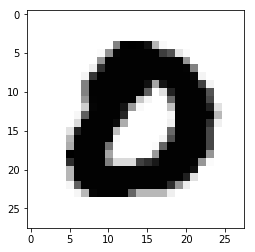

In [19]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt
%matplotlib inline  
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

hypothesis = tf.matmul(X, W) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()



In [ ]:
# Lab 10 MNIST and NN
# Neural Network 버젼
import tensorflow as tf
import random
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
# 입력만 784로 하면 중간은 맘대로 정하면 됨
# Relu를 사용
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

# 마지막 출력만 10으로 맞춰주면 됨
W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

sess.close()


In [12]:
# Lab 10 MNIST and Xavier
import tensorflow as tf
import random
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
# 초기화 하는 부분만 xavier 방식을 사용하도록 바꿈
W1 = tf.get_variable("W1", shape=[784, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[256, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

# 첫 번쨰 코스트 부터 낮음 / 좋은 초기값을 썻다는 뜻

sess.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


ValueError: Variable W1 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 3414, in create_op
    op_def=op_def)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)


In [10]:
# Lab 10 MNIST and Deep learning
# 좀더 깊고 넓게 해보자. 오히려 성능이 떨어지네?
# 아마 오버피팅 때문에 그럴거 같음
import tensorflow as tf
import random
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()




Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


ValueError: Variable W1 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 3414, in create_op
    op_def=op_def)
  File "C:\Users\rbgud\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
